<a href="https://colab.research.google.com/github/kojiyam/denso/blob/master/denso01_water_filling_jp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
np.random.seed(1)
np.set_printoptions(precision=2, floatmode='maxprec')
import matplotlib.pyplot as plt
#plt.style.use('dark_background')  # For dark mode
plt.rcParams["font.size"] = 16   # Font size in figures

# Parameters

In [2]:
G = np.sort(np.array([0.1, 0.25, 0.5, 0.75])) # Channel gain
C = len(G) # Number of channels

$ G_c / { \sigma_c}^2 $を `G` としている

`G` は昇順に並べてある

In [3]:
def water_pour(P):
  for i in range(C):
    g = G[i:]
    lmd = (C - i)/(P + np.sum(1/g))
    p = 1/lmd - 1/g
    if np.all(p > 0):
      p = np.concatenate([np.zeros(i), p])
      return p
  return np.zeros(i + 1)

`G` を昇順に並べてあるため，送信電力$p_c$は$c$の大きいところ（$G$の大きいところ）では正の値，小さいところでは0になる可能性がある

$ p_i > 0 $, $ p_{i-1} = 0 $とすると次式が成り立つ．（i=0の場合は...）

$ \displaystyle \sum_{c=i}^{C-1} \left( p_c^\star + \frac{\sigma_c^2}{G_c} \right) = \frac{C-i}{ \lambda^\star } $

In [4]:
print(water_pour(2))

[0.   0.   0.67 1.33]


In [5]:
P = np.arange(0, 30, 0.25)
ps = [] # 最適解
for pp in P:
  p = water_pour(pp)
  ps.append(p)
ps = np.array(ps)

In [6]:
print(ps.shape)

(120, 4)


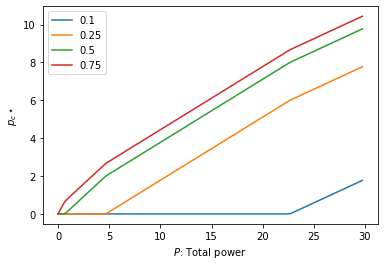

In [16]:
for i in range(C):
  plt.plot(P, ps[:,i], label=G[i])
plt.xlabel(r'$P$: Total power')
plt.ylabel(r'$p_c\star$')
plt.legend()

## 参考
2020 Mainly by Masanori Ueno. Shunnosuke Kotera